Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

Read Data

In [2]:
edu = pd.read_csv(r"C:\Users\DELL\Desktop\Portfolio Projects\Build Classification Model\xAPI-Edu-Data.csv")
edu.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


Getting To Know Data

In [3]:
edu.shape

(480, 17)

In [4]:
edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [7]:
#Another method to know variable data types
edu.columns[edu.dtypes=="object"]

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey',
       'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class'],
      dtype='object')

Showing Basic Statistics

Now that you’ve seen what data types are in your dataset, it’s time to get an overview of the values each column contains. To do this with .describe():

In [5]:
edu.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


Check The Nulls Values On Edu Dataset

In [8]:
edu.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

There are no nulls found in Edu Dataset, That means we can ready build classification model

* Visualize The Categorical Features Individually 

In [9]:
categorical_features = edu.dtypes[edu.dtypes=='object'].index
print("Number Of Categorical Features" , len(categorical_features))
print(categorical_features)


Number Of Categorical Features 13
Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey',
       'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class'],
      dtype='object')


AxesSubplot(0.125,0.125;0.775x0.755)
Attribute Name ---> gender


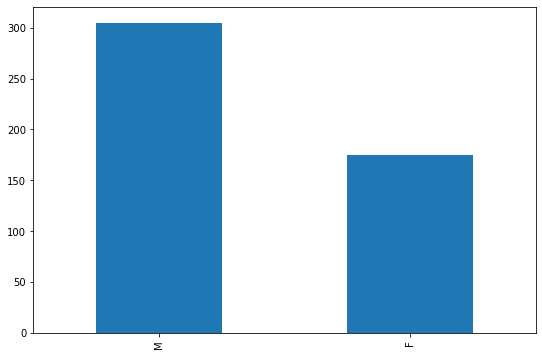

AxesSubplot(0.125,0.125;0.775x0.755)
Attribute Name ---> NationalITy


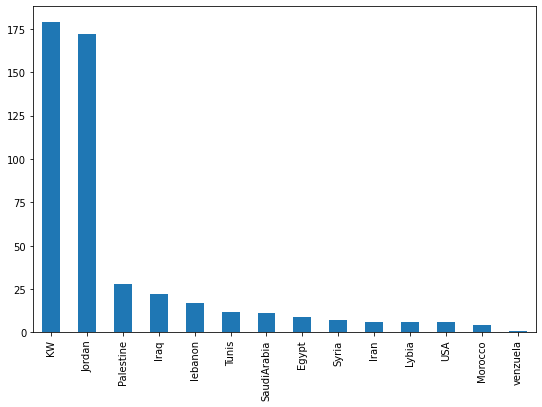

AxesSubplot(0.125,0.125;0.775x0.755)
Attribute Name ---> PlaceofBirth


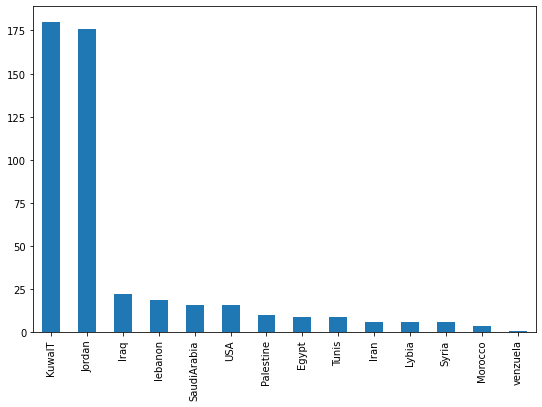

AxesSubplot(0.125,0.125;0.775x0.755)
Attribute Name ---> StageID


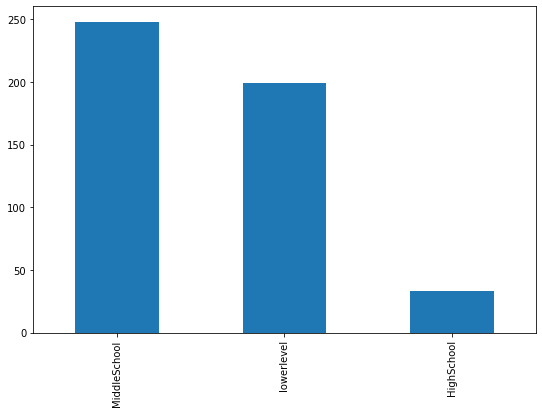

AxesSubplot(0.125,0.125;0.775x0.755)
Attribute Name ---> GradeID


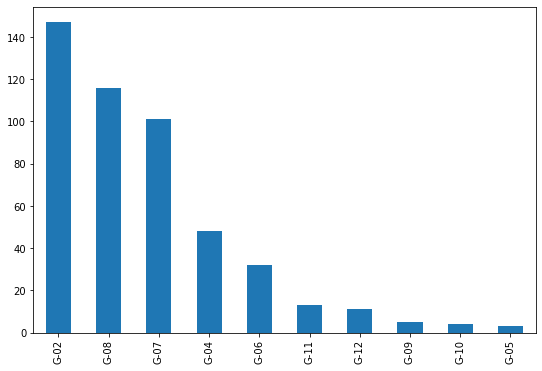

AxesSubplot(0.125,0.125;0.775x0.755)
Attribute Name ---> SectionID


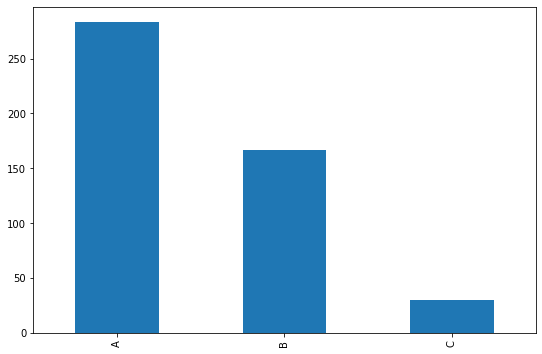

AxesSubplot(0.125,0.125;0.775x0.755)
Attribute Name ---> Topic


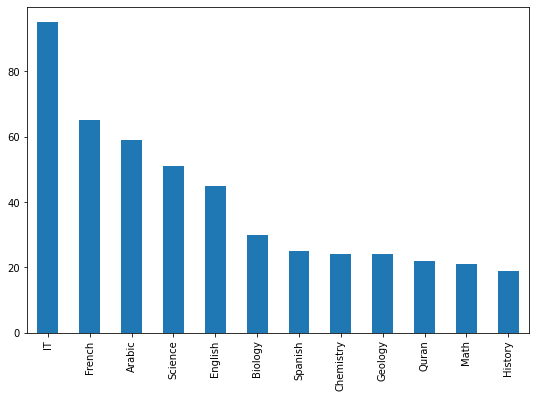

AxesSubplot(0.125,0.125;0.775x0.755)
Attribute Name ---> Semester


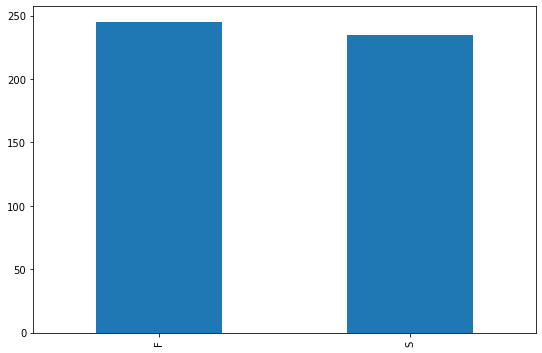

AxesSubplot(0.125,0.125;0.775x0.755)
Attribute Name ---> Relation


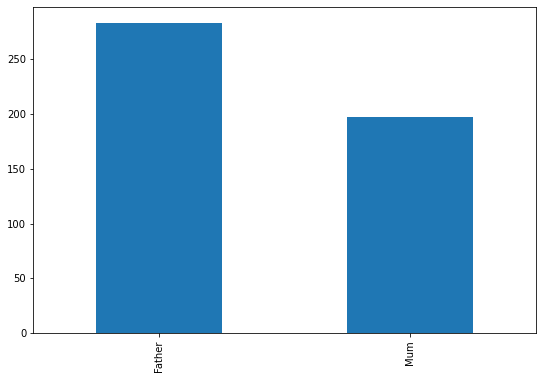

AxesSubplot(0.125,0.125;0.775x0.755)
Attribute Name ---> ParentAnsweringSurvey


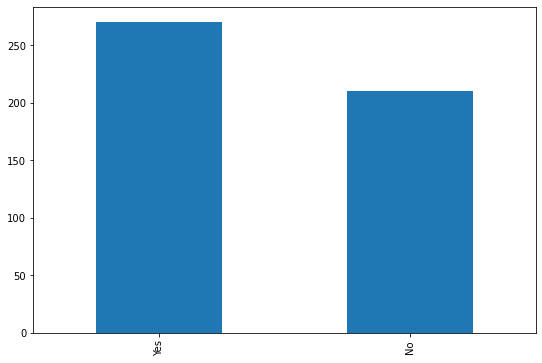

AxesSubplot(0.125,0.125;0.775x0.755)
Attribute Name ---> ParentschoolSatisfaction


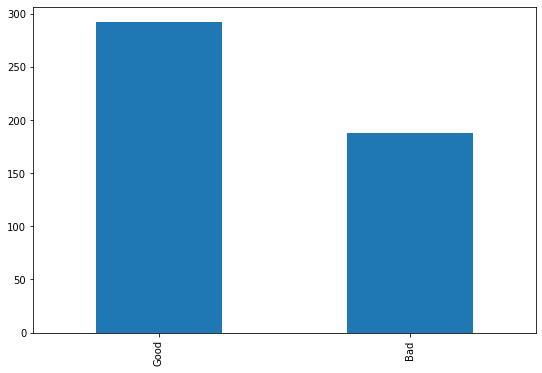

AxesSubplot(0.125,0.125;0.775x0.755)
Attribute Name ---> StudentAbsenceDays


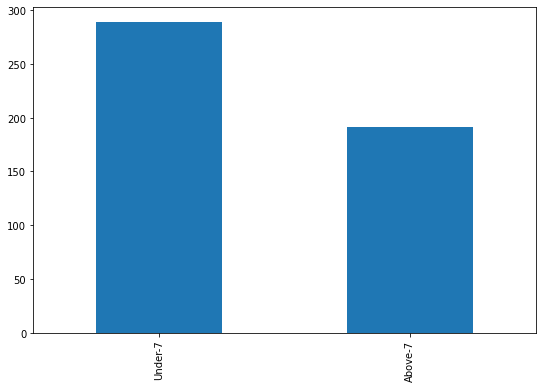

AxesSubplot(0.125,0.125;0.775x0.755)
Attribute Name ---> Class


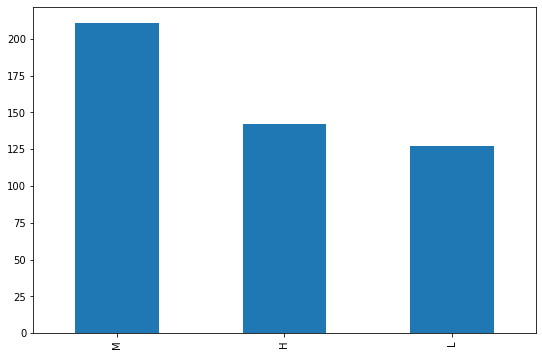

In [10]:
#visualize features

for i in categorical_features:
    print(edu[i].sort_values().value_counts().plot(kind='bar',figsize=(9, 6)))
    print( "Attribute Name --->"  ,i)
    
    plt.show() 

Comparing Categorial Features

<AxesSubplot:xlabel='gender', ylabel='count'>

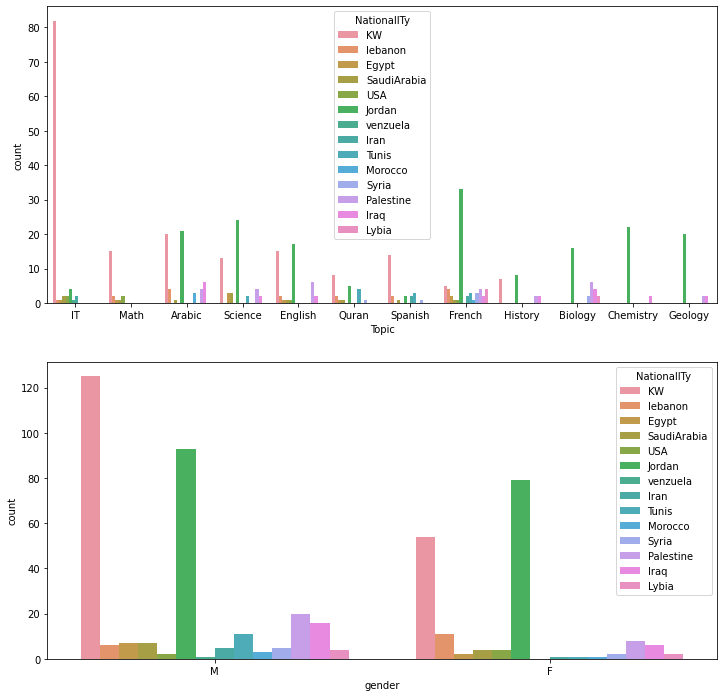

In [11]:
# Comapring Topic to Nationality feartures and Gender with Nationality 
fig, (A, B)  = plt.subplots(2, 1,figsize=(12,12))
sns.countplot(x='Topic', hue='NationalITy', data=edu ,ax=A )
sns.countplot(x='gender', hue='NationalITy', data=edu ,ax=B)

* Comparing nationality with topic more people from KW  are in IT sector.

* Comparing gender with nationality max male and female are from KW.

<AxesSubplot:xlabel='gender', ylabel='count'>

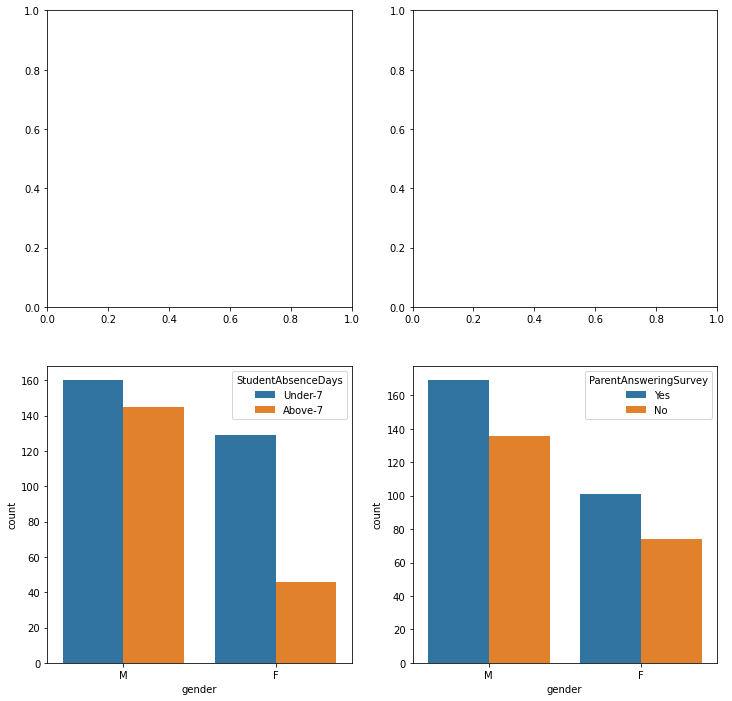

In [12]:
#Comparing Gender with StudentAbsentDays and ParentAnsweringSurvy

fig, axis  = plt.subplots(2,2,figsize=(12,12))
sns.countplot(x='gender', hue='StudentAbsenceDays', data=edu, ax=axis[1,0])
sns.countplot(x='gender', hue='ParentAnsweringSurvey', data=edu, ax=axis[1,1])

Visualize Categorical With Numerical 

<AxesSubplot:xlabel='Class', ylabel='VisITedResources'>

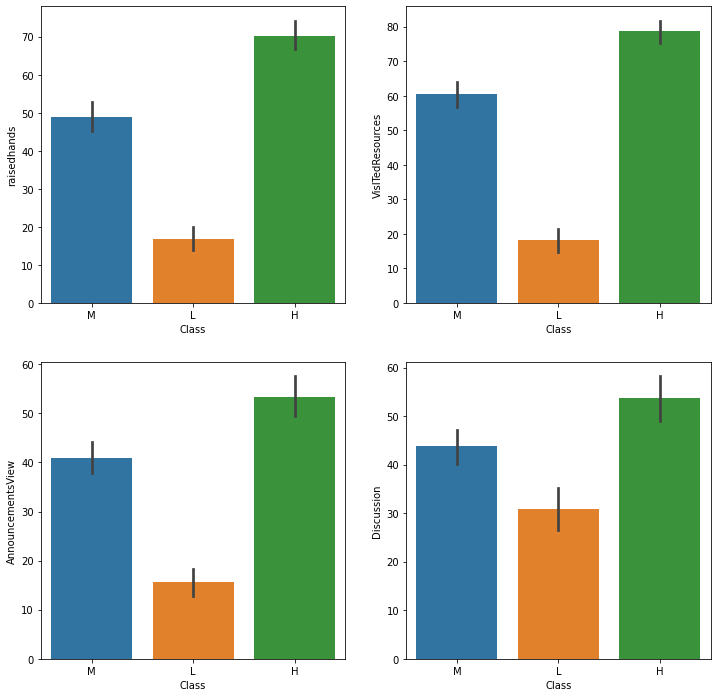

In [13]:
fig, axis  = plt.subplots(2,2,figsize=(12,12))
sns.barplot(x='Class', y='AnnouncementsView', data=edu, ax=axis[1,0])
sns.barplot(x='Class', y='Discussion', data=edu, ax=axis[1,1])
sns.barplot(x='Class', y='raisedhands', data=edu, ax=axis[0,0])
sns.barplot(x='Class', y='VisITedResources', data=edu, ax=axis[0,1])

* The students comes in Higher class are very good attendive to Raisehand. 
* Discussion, Announcements veiwed and visiting rescources in school Medium class studens are in Mid range in all 4 parametors 
* Lower class student has Low  range in AnnouncementsView and  VisITedResources .

Making Prediction Using Machine Learning Algorithm

In [14]:
edu.gender.replace({'M':1,'F':0},inplace = True)
edu.ParentAnsweringSurvey.replace({'Yes':1,'No':0},inplace = True)
edu.ParentschoolSatisfaction.replace({'Good':1,'Bad':0},inplace = True)
edu.Class.replace({'L':0,'M':1 , 'H':2},inplace = True)
edu.StudentAbsenceDays.replace({'Above-7':1,'Under-7':0},inplace = True)
edu.StageID.replace({'lowerlevel':0,'MiddleSchool':1 , 'HighSchool':2},inplace = True)

In [15]:
le= LabelEncoder()


edu.NationalITy = le.fit_transform(edu.NationalITy)
edu.PlaceofBirth = le.fit_transform(edu.PlaceofBirth)
edu.GradeID = le.fit_transform(edu.GradeID)
edu.SectionID = le.fit_transform(edu.SectionID)
edu.Topic = le.fit_transform(edu.Topic)
edu.Semester = le.fit_transform(edu.Semester)
edu.Relation = le.fit_transform(edu.Relation)

Why we need to use Lable Encoder:
* LabelEncoder can be used to normalize labels. 
* It can also be used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels.

We have some categorical features to convert into numercal.

Split Data into Train And Test

In [16]:
edu_train , edu_test = train_test_split( edu , test_size=0.2 , random_state=0)

In [17]:
edu_train_X = edu_train.iloc[:,0:-1]
edu_train_y = edu_train.iloc[:,-1]

edu_test_X = edu_test.iloc[:,0:-1]
edu_test_y = edu_test.iloc[:,-1]

Features Scaling

In [18]:
LR = LogisticRegression()

In [19]:
#fiting logistic regression on train set
LR.fit(edu_train_X, edu_train_y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
pred_lr = LR.predict(edu_test_X)
print(pred_lr)

[1 0 1 1 1 1 2 0 0 1 2 0 2 0 1 1 1 0 1 1 0 1 1 2 2 2 1 1 1 0 1 0 1 1 2 1 2
 1 1 1 1 0 2 2 1 1 2 1 0 0 1 2 2 0 2 1 0 0 2 1 1 1 2 1 2 1 0 1 0 0 0 0 1 0
 2 0 1 0 1 0 2 1 2 0 0 2 1 2 1 1 1 1 1 1 1 2]


Predicting Test Set

In [23]:
y_pred = LR.predict(edu_test_X)
print(list(y_pred))

[1, 0, 1, 1, 1, 1, 2, 0, 0, 1, 2, 0, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 2, 2, 2, 1, 1, 1, 0, 1, 0, 1, 1, 2, 1, 2, 1, 1, 1, 1, 0, 2, 2, 1, 1, 2, 1, 0, 0, 1, 2, 2, 0, 2, 1, 0, 0, 2, 1, 1, 1, 2, 1, 2, 1, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0, 1, 0, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2]


Confusion Matix

In [25]:
conf_matrix = confusion_matrix(edu_test_y, pred_lr)
print(conf_matrix)

[[22  1  0]
 [ 4 33  8]
 [ 0 13 15]]


Accuracy Test

In [35]:
acc = accuracy_score(pred_lr, edu_test_y)*100
print("Accuracy Score is ", acc)

Accuracy Score is  72.91666666666666


Classification Report 

In [36]:
print(classification_report(pred_lr, edu_test_y))

print("\n")

print(confusion_matrix(edu_test_y, pred_lr))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90        26
           1       0.73      0.70      0.72        47
           2       0.54      0.65      0.59        23

    accuracy                           0.73        96
   macro avg       0.74      0.73      0.73        96
weighted avg       0.75      0.73      0.74        96



[[22  1  0]
 [ 4 33  8]
 [ 0 13 15]]


In [41]:
pred_report = LR.predict_proba(edu.iloc[:, 0:-1]) 
pred_report = pd.DataFrame(pred_report)
pred_report.rename(columns={0: 'Prob_Lower', 1: 'Prob_Middle', 2: 'Prob_High'}, inplace=True)
pred_report.sort_values('Prob_High' , ascending = False)

,Prob_Lower,Prob_Middle,Prob_High
328,0.000114,0.048049,0.951837
404,0.000108,0.057811,0.942081
329,0.000154,0.062048,0.937798
274,0.000121,0.064277,0.935602
314,0.000042,0.070461,0.929497
...,...,...,...
64,0.901050,0.098197,0.000753
231,0.932910,0.066372,0.000718
85,0.938590,0.060715,0.000695
38,0.935582,0.063752,0.000666
